In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
train_data = pd.read_csv('train.txt', names=['text', 'emotion'], sep=';')
val_data = pd.read_csv('val.txt', names=['text', 'emotion'], sep=';')
test_data = pd.read_csv('test.txt', names=['text', 'emotion'], sep=';')

In [69]:
frames=[train_data,val_data,test_data]
df=pd.concat(frames)

In [70]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [71]:
# Encode labels in column 'species'.
df['sentiment_label']= label_encoder.fit_transform(df['emotion'])
 
df['sentiment_label'].unique()

array([4, 0, 3, 5, 1, 2])

In [72]:
df

,text,emotion,sentiment_label
0,i didnt feel humiliated,sadness,4
1,i can go from feeling so hopeless to so damned...,sadness,4
2,im grabbing a minute to post i feel greedy wrong,anger,0
3,i am ever feeling nostalgic about the fireplac...,love,3
4,i am feeling grouchy,anger,0
...,...,...,...
1995,i just keep feeling like someone is being unki...,anger,0
1996,im feeling a little cranky negative after this...,anger,0
1997,i feel that i am useful to my people and that ...,joy,2
1998,im feeling more comfortable with derby i feel ...,joy,2


In [73]:
print(df[df['sentiment_label']==0])
print(df[df['sentiment_label']==1])
print(df[df['sentiment_label']==2])
print(df[df['sentiment_label']==3])
print(df[df['sentiment_label']==4])
print(df[df['sentiment_label']==5])

                                                   text  ... sentiment_label
2      im grabbing a minute to post i feel greedy wrong  ...               0
4                                  i am feeling grouchy  ...               0
12    i think it s the easiest time of year to feel ...  ...               0
20    i feel irritated and rejected without anyone d...  ...               0
24    i already feel like i fucked up though because...  ...               0
...                                                 ...  ...             ...
1984  i came out of the airport that makes me feel i...  ...               0
1992  i feel tortured delilahlwl am considering i ha...  ...               0
1993  i told my fiance how i am feeling so angry and...  ...               0
1995  i just keep feeling like someone is being unki...  ...               0
1996  im feeling a little cranky negative after this...  ...               0

[2709 rows x 3 columns]
                                                   

In [74]:
df.shape

(20000, 3)

In [75]:
print("train data shape: ",train_data.shape)
print("validation data shape: ",val_data.shape)
print("test data shape: ",test_data.shape)

train data shape:  (16000, 2)
validation data shape:  (2000, 2)
test data shape:  (2000, 2)


In [76]:
train_data['sentiment_label']= label_encoder.fit_transform(train_data['emotion'])
train_data['sentiment_label'].unique()

test_data['sentiment_label']= label_encoder.fit_transform(test_data['emotion'])
test_data['sentiment_label'].unique()

val_data['sentiment_label']= label_encoder.fit_transform(val_data['emotion'])
val_data['sentiment_label'].unique()

array([4, 3, 0, 2, 1, 5])

In [77]:
train_data.head()

,text,emotion,sentiment_label
0,i didnt feel humiliated,sadness,4
1,i can go from feeling so hopeless to so damned...,sadness,4
2,im grabbing a minute to post i feel greedy wrong,anger,0
3,i am ever feeling nostalgic about the fireplac...,love,3
4,i am feeling grouchy,anger,0


In [78]:
test_data.head()

,text,emotion,sentiment_label
0,im feeling rather rotten so im not very ambiti...,sadness,4
1,im updating my blog because i feel shitty,sadness,4
2,i never make her separate from me because i do...,sadness,4
3,i left with my bouquet of red and yellow tulip...,joy,2
4,i was feeling a little vain when i did this one,sadness,4


In [79]:
val_data.head()

,text,emotion,sentiment_label
0,im feeling quite sad and sorry for myself but ...,sadness,4
1,i feel like i am still looking at a blank canv...,sadness,4
2,i feel like a faithful servant,love,3
3,i am just feeling cranky and blue,anger,0
4,i can have for a treat or if i am feeling festive,joy,2


In [80]:
print(train_data.isnull().any())
print(val_data.isnull().any())
print(test_data.isnull().any())

text               False
emotion            False
sentiment_label    False
dtype: bool
text               False
emotion            False
sentiment_label    False
dtype: bool
text               False
emotion            False
sentiment_label    False
dtype: bool


In [28]:
import nltk

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [81]:
from nltk.corpus import stopwords
# Making all letters lowercase
train_data['text'] = train_data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Removing Punctuation, Symbols
train_data['text'] = train_data['text'].str.replace('[^\w\s]',' ')

# Removing Stop Words using NLTK
stop = stopwords.words('english')
train_data['text'] = train_data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

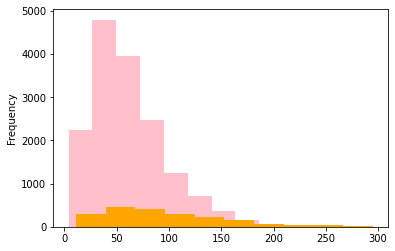

In [82]:
# checking the distribution of tweets in the data

length_train = train_data['text'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_val = val_data['text'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [83]:
# adding a column to represent the length of the tweet
train_data['len'] = train_data['text'].str.len()
val_data['len'] = val_data['text'].str.len()
train_data.head(10)

,text,emotion,sentiment_label,len
0,didnt feel humiliated,sadness,4,21
1,go feeling hopeless damned hopeful around some...,sadness,4,61
2,im grabbing minute post feel greedy wrong,anger,0,41
3,ever feeling nostalgic fireplace know still pr...,love,3,52
4,feeling grouchy,anger,0,15
5,ive feeling little burdened lately wasnt sure,sadness,4,45
6,ive taking milligrams times recommended amount...,surprise,5,96
7,feel confused life teenager jaded year old man,fear,1,46
8,petronas years feel petronas performed well ma...,joy,2,60
9,feel romantic,love,3,13


In [84]:
train_data.groupby('emotion').describe()

sentiment_label                      ...   len                          
                   count mean  std  min  25%  ...   min    25%   50%   75%    max
emotion                                       ...                                
anger             2159.0  0.0  0.0  0.0  0.0  ...   4.0  33.00  54.0  81.0  218.0
fear              1937.0  1.0  0.0  1.0  1.0  ...   4.0  35.00  54.0  79.0  213.0
joy               5362.0  2.0  0.0  2.0  2.0  ...   8.0  36.00  56.0  82.0  227.0
love              1304.0  3.0  0.0  3.0  3.0  ...  11.0  39.00  60.0  85.0  215.0
sadness           4666.0  4.0  0.0  4.0  4.0  ...   7.0  33.00  51.0  78.0  232.0
surprise           572.0  5.0  0.0  5.0  5.0  ...  10.0  38.75  57.0  84.0  197.0

[6 rows x 16 columns]

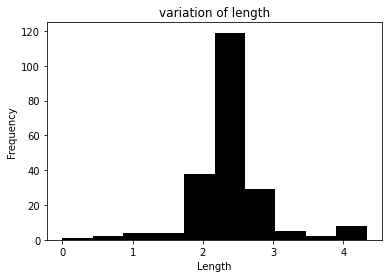

In [86]:
train_data.groupby('len').mean()['sentiment_label'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

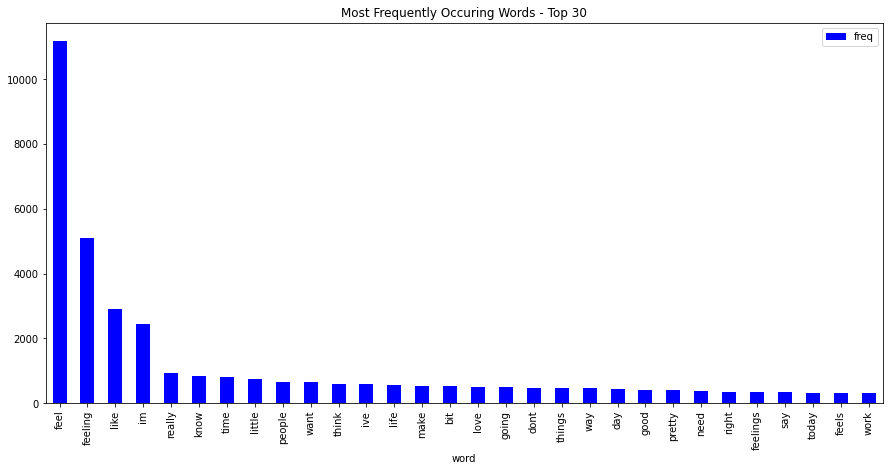

In [88]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train_data.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
#print(frequency)

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

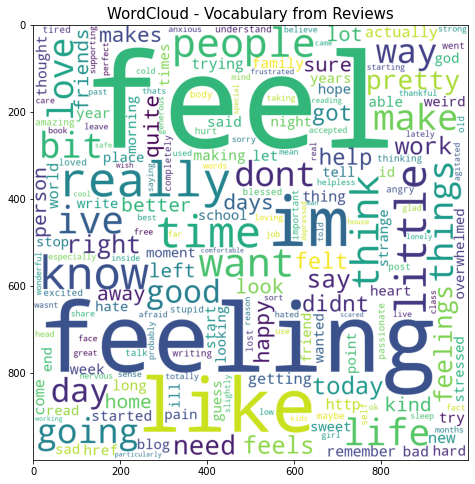

In [89]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 15)

algorithms

In [92]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [93]:
# tokenizing the words present in the training set
tokenized_tweet = train_data['text'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train_data['text']), epochs=20)

(2398567, 2992980)

In [94]:
tokenized_tweet

0                                [didnt, feel, humiliated]
1        [go, feeling, hopeless, damned, hopeful, aroun...
2        [im, grabbing, minute, post, feel, greedy, wrong]
3        [ever, feeling, nostalgic, fireplace, know, st...
4                                       [feeling, grouchy]
                               ...                        
15995    [brief, time, beanbag, said, anna, feel, like,...
15996    [turning, feel, pathetic, still, waiting, tabl...
15997                        [feel, strong, good, overall]
15998                [feel, like, rude, comment, im, glad]
15999                   [know, lot, feel, stupid, portray]
Name: text, Length: 16000, dtype: object

In [95]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


[LabeledSentence(words=['didnt', 'feel', 'humiliated'], tags=['tweet_0']),
 LabeledSentence(words=['go', 'feeling', 'hopeless', 'damned', 'hopeful', 'around', 'someone', 'cares', 'awake'], tags=['tweet_1']),
 LabeledSentence(words=['im', 'grabbing', 'minute', 'post', 'feel', 'greedy', 'wrong'], tags=['tweet_2']),
 LabeledSentence(words=['ever', 'feeling', 'nostalgic', 'fireplace', 'know', 'still', 'property'], tags=['tweet_3']),
 LabeledSentence(words=['feeling', 'grouchy'], tags=['tweet_4']),
 LabeledSentence(words=['ive', 'feeling', 'little', 'burdened', 'lately', 'wasnt', 'sure'], tags=['tweet_5'])]

In [96]:
from nltk.stem.porter import PorterStemmer
import re

In [99]:
train_corpus = []

for i in range(0, 16000):
  review = re.sub('[^a-zA-Z]', ' ', train_data['text'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [101]:
test_corpus = []

for i in range(0, 2000): # 2000 size of test_data
  review = re.sub('[^a-zA-Z]', ' ', test_data['text'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [113]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train_data.iloc[:, 2]

print(x.shape)
print(y.shape)

(16000, 2500)
(16000,)


In [114]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(2000, 2500)


In [115]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(12000, 2500)
(4000, 2500)
(12000,)
(4000,)


In [119]:
x_valid

array([[-0.02786114, -0.05089228, -0.10523423, ..., -0.02310017,
        -0.02041667, -0.0258285 ],
       [-0.02786114, -0.05089228, -0.10523423, ..., -0.02310017,
        -0.02041667, -0.0258285 ],
       [-0.02786114, -0.05089228, -0.10523423, ..., -0.02310017,
        -0.02041667, -0.0258285 ],
       ...,
       [-0.02786114, -0.05089228, -0.10523423, ..., -0.02310017,
        -0.02041667, -0.0258285 ],
       [-0.02786114, -0.05089228, -0.10523423, ..., -0.02310017,
        -0.02041667, -0.0258285 ],
       [-0.02786114, -0.05089228, -0.10523423, ..., -0.02310017,
        -0.02041667, -0.0258285 ]])

In [117]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))



# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9975
Validation Accuracy : 0.844
[[ 452   20   10    4   21    3]
 [  27  415    7    2   13   23]
 [  38   22 1102   63   64   15]
 [   8    7   83  257   11    1]
 [  66   36   18   18 1035    6]
 [   2   15   10    4    7  115]]


In [125]:
# calculating the f1 score for the validation set
#print("F1 score :", f1_score(y_valid, y_pred))

In [126]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training Accuracy : 0.9965
Validation Accuracy : 0.772


In [128]:
# calculating the f1 score for the validation set
#print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

[[ 388   29   30   13   43    7]
 [  33  351   33    9   41   20]
 [  32   24 1074   94   66   14]
 [   9   12   97  219   28    2]
 [  62   29   80   26  971   11]
 [   1   25   23    4   15   85]]


In [129]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

Training Accuracy : 0.9975
Validation Accuracy : 0.806


In [130]:
# calculating the f1 score for the validation set
#print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

[[ 423   30   14    5   35    3]
 [  27  408    7    4   23   18]
 [  40   21 1059   72   96   16]
 [  13    9   88  236   19    2]
 [  70   37   43   15 1005    9]
 [   2   22   22    2   12   93]]


In [132]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
#print("f1 score :", f1_score(y_valid, y_pred))

KeyboardInterrupt: ignored

- svc taking a lot of time

In [ ]:
# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

In [133]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

KeyboardInterrupt: ignored

In [ ]:
# calculating the f1 score for the validation set
#print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)